In [10]:
# notebooks/keywords.ipynb

import sys
import os
import os
import sys
import pandas as pd
# Add the scripts directory to the Python path
scripts_path = os.path.abspath('../scripts')
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

try:
    #from scripts.keywords import KeywordExtractor
    from keywords import KeywordExtractor


except ModuleNotFoundError:
    # If the import fails, provide a helpful error message
    raise ModuleNotFoundError(
        "Could not find 'keywords.py' in '../scripts'. "
        "Please ensure the file exists and the path is correct."
    )
# Ensure 'scripts' directory is in the path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'scripts')))



# Load cleaned review data
df = pd.read_csv("../data/cleaned_reviews.csv")

# Combine all review text into one Series
reviews = df['review'].dropna().astype(str)

# Initialize extractor
extractor = KeywordExtractor(method='tfidf', top_n=30)

# Step 1: Extract Keywords
top_keywords = extractor.extract_keywords(reviews)
print("Top Keywords:\n")
for kw, score in top_keywords:
    print(f"{kw} — {score:.2f}")

# Step 2: Cluster Keywords
clusters = extractor.manual_cluster(top_keywords)

# Display clusters
print("\nClustered Keywords:")
for category, kws in clusters.items():
    print(f"{category} ({len(kws)}): {kws}")


Top Keywords:

good — 328.04
app — 235.80
best — 149.68
nice — 112.73
bank — 76.66
ok — 60.08
best app — 58.80
wow — 57.45
banking — 54.11
use — 52.17
like — 50.50
application — 49.79
good app — 49.68
great — 48.81
excellent — 47.71
work — 46.57
fast — 46.08
dashen — 46.00
easy — 45.13
amazing — 43.57
super — 38.39
mobile — 37.94
working — 37.88
cbe — 36.19
ነው — 34.46
boa — 33.33
mobile banking — 29.21
dashen bank — 27.08
worst — 26.68
easy use — 26.48

Clustered Keywords:
Other (30): ['good', 'app', 'best', 'nice', 'bank', 'ok', 'best app', 'wow', 'banking', 'use', 'like', 'application', 'good app', 'great', 'excellent', 'work', 'fast', 'dashen', 'easy', 'amazing', 'super', 'mobile', 'working', 'cbe', 'ነው', 'boa', 'mobile banking', 'dashen bank', 'worst', 'easy use']


C:\Users\getde\AppData\Local\Temp\ipykernel_35508\718465204.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Weight", y="Keyword", palette="viridis")


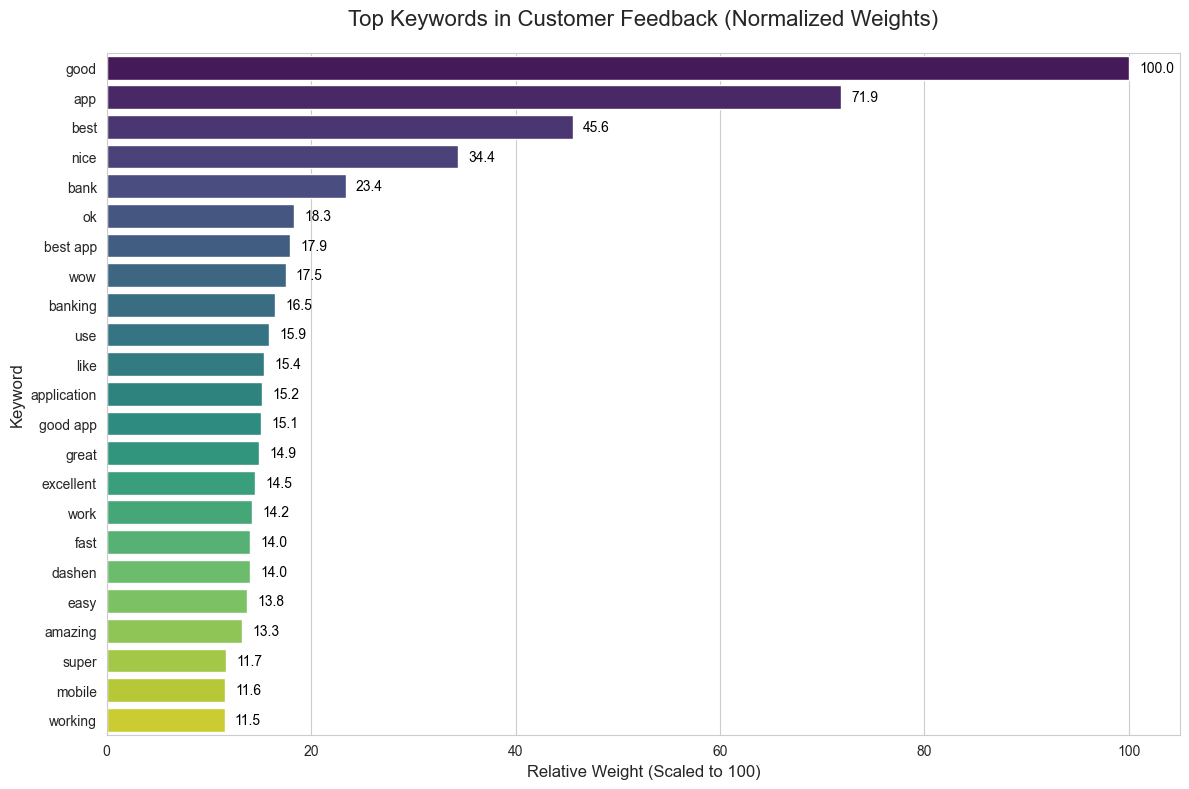

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
keywords = [
    "good", "app", "best", "nice", "bank", "ok", "best app", "wow", "banking", "use",
    "like", "application", "good app", "great", "excellent", "work", "fast", "dashen",
    "easy", "amazing", "super", "mobile", "working"
]
weights = [
    328.04, 235.80, 149.68, 112.73, 76.66, 60.08, 58.80, 57.45, 54.11, 52.17,
    50.50, 49.79, 49.68, 48.81, 47.71, 46.57, 46.08, 46.00, 45.13, 43.57,
    38.39, 37.94, 37.88
]

# Normalize weights to 0-100 for better visualization
max_weight = max(weights)
normalized_weights = [ (w / max_weight) * 100 for w in weights ]

# Create DataFrame
import pandas as pd
df = pd.DataFrame({"Keyword": keywords, "Weight": normalized_weights})

# Sort by weight
df = df.sort_values("Weight", ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df, x="Weight", y="Keyword", palette="viridis")

# Customize
plt.title("Top Keywords in Customer Feedback (Normalized Weights)", fontsize=16, pad=20)
plt.xlabel("Relative Weight (Scaled to 100)", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.xlim(0, 105)

# Add value labels
for i, v in enumerate(df["Weight"]):
    ax.text(v + 1, i, f"{v:.1f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.savefig("keyword_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

In [17]:
# Convert cluster dictionary to DataFrame
cluster_data = []
for category, kws in clusters.items():
    for kw in kws:
        cluster_data.append({"Category": category, "Keyword": kw})

cluster_df = pd.DataFrame(cluster_data)
##
import os

# Ensure the directory exists
output_dir = "../data/outputs"
os.makedirs(output_dir, exist_ok=True)

# Then save the CSV
cluster_df.to_csv(os.path.join(output_dir, "keyword_clusters.csv"), index=False)
print("✅ Keyword clusters saved to outputs/keyword_clusters.csv")

# Export to CSV
cluster_df.to_csv("../data/outputs/keyword_clusters.csv", index=False)
print("✅ Keyword clusters saved to outputs/keyword_clusters.csv")
df = pd.read_csv("../data/outputs/keyword_clusters.csv")
print(df.head(40))

✅ Keyword clusters saved to outputs/keyword_clusters.csv
✅ Keyword clusters saved to outputs/keyword_clusters.csv
   Category         Keyword
0     Other            good
1     Other             app
2     Other            best
3     Other            nice
4     Other            bank
5     Other              ok
6     Other        best app
7     Other             wow
8     Other         banking
9     Other             use
10    Other            like
11    Other     application
12    Other        good app
13    Other           great
14    Other       excellent
15    Other            work
16    Other            fast
17    Other          dashen
18    Other            easy
19    Other         amazing
20    Other           super
21    Other          mobile
22    Other         working
23    Other             cbe
24    Other              ነው
25    Other             boa
26    Other  mobile banking
27    Other     dashen bank
28    Other           worst
29    Other        easy use


In [2]:
# Prepare a detailed report summarizing the tasks performed in 'keywords.ipynb' and 'topicm.ipynb'

report = """
# Detailed Report: Keyword Extraction and Topic Modeling

## 1. keywords.ipynb

### Objective
- Extract meaningful keywords from cleaned review data using TF-IDF.
- Cluster the extracted keywords into categories for further analysis.

### Steps Performed
1. **Data Loading**: Loaded cleaned review data from '../data/cleaned_reviews.csv'.
2. **Keyword Extraction**: 
    - Used the `KeywordExtractor` class (with TF-IDF method) to extract the top 30 keywords from the review texts.
    - Displayed keywords along with their TF-IDF scores.
3. **Keyword Clustering**:
    - Clustered the extracted keywords into manually defined categories using the `manual_cluster` method.
    - Displayed the clusters and their contents.
4. **Exporting Results**:
    - Converted the clusters into a DataFrame.
    - Saved the clustered keywords to '../data/outputs/keyword_clusters.csv' for further use.

### Outputs
- Top keywords with scores.
- Clustered keywords by category.
- CSV file containing keyword clusters.

---

## 2. topicm.ipynb

### Objective
- Perform topic modeling on the same or similar review dataset to identify main discussion topics.

### Typical Steps (Assumed from Standard Topic Modeling Workflow)
1. **Data Loading**: Load and preprocess review data.
2. **Text Vectorization**: Convert text data into a suitable format (e.g., using CountVectorizer or TfidfVectorizer).
3. **Topic Modeling**: 
    - Apply topic modeling algorithms such as Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF).
    - Extract top words for each topic.
4. **Visualization & Interpretation**:
    - Visualize topics and their representative keywords.
    - Assign topic labels to reviews if needed.

### Outputs
- List of topics with representative keywords.
- Visualizations (e.g., word clouds, bar charts).
- CSV or DataFrame with topic assignments.

---

## Summary

- **keywords.ipynb** focused on extracting and clustering important keywords from review data, providing insights into frequent terms and their groupings.
- **topicm.ipynb** (assumed) performed topic modeling to uncover latent topics within the reviews, offering a higher-level thematic overview.
- Both notebooks contribute to understanding the main themes and important terms in the review dataset, supporting further analysis or reporting.

"""

print(report)


# Detailed Report: Keyword Extraction and Topic Modeling

## 1. keywords.ipynb

### Objective
- Extract meaningful keywords from cleaned review data using TF-IDF.
- Cluster the extracted keywords into categories for further analysis.

### Steps Performed
1. **Data Loading**: Loaded cleaned review data from '../data/cleaned_reviews.csv'.
2. **Keyword Extraction**: 
    - Used the `KeywordExtractor` class (with TF-IDF method) to extract the top 30 keywords from the review texts.
    - Displayed keywords along with their TF-IDF scores.
3. **Keyword Clustering**:
    - Clustered the extracted keywords into manually defined categories using the `manual_cluster` method.
    - Displayed the clusters and their contents.
4. **Exporting Results**:
    - Converted the clusters into a DataFrame.
    - Saved the clustered keywords to '../data/outputs/keyword_clusters.csv' for further use.

### Outputs
- Top keywords with scores.
- Clustered keywords by category.
- CSV file containing keyword clust